In [1]:
# Import core data and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#see informations about data
df = pd.read_csv("StudentsPerformance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# First is Cleaning Process

In [6]:
# Rename columns to consistent snake_case format
df.columns = [
    'gender',
    'race_ethnicity',
    'parental_education',
    'lunch',
    'test_prep_course',
    'math_score',
    'reading_score',
    'writing_score'
]

# Verify the changes
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score', 'writing_score'],
      dtype='object')


In [7]:
# Standardize text values: lowercase and remove leading/trailing spaces
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Verify the change for a few columns
for col in ['gender', 'race_ethnicity', 'parental_education', 'lunch', 'test_prep_course']:
    print(f"{col}: {df[col].unique()}")

gender: ['female' 'male']
race_ethnicity: ['group b' 'group c' 'group a' 'group d' 'group e']
parental_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_prep_course: ['none' 'completed']


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\3705816313.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [8]:
# Validate score ranges: all scores must be integers between 0 and 100 inclusive
score_cols = ['math_score', 'reading_score', 'writing_score']

# Quick min/max sanity check
print(df[score_cols].agg(['min', 'max']))

# Build boolean masks for out-of-range values
violations = {}
for col in score_cols:
    mask = (df[col] < 0) | (df[col] > 100)
    violations[col] = mask

# Summarize violation counts per column
violation_counts = {col: v.sum() for col, v in violations.items()}
print("Out-of-range counts per column:", violation_counts)

# If any violations exist, show offending rows with columns of interest
if any(count > 0 for count in violation_counts.values()):
    bad_rows_mask = violations['math_score'] | violations['reading_score'] | violations['writing_score']
    print("Rows with out-of-range scores:")
    display(df.loc[bad_rows_mask, ['gender','race_ethnicity','parental_education','lunch','test_prep_course'] + score_cols])
else:
    print("All score values are within the valid 0–100 range.")


     math_score  reading_score  writing_score
min           0             17             10
max         100            100            100
Out-of-range counts per column: {'math_score': np.int64(0), 'reading_score': np.int64(0), 'writing_score': np.int64(0)}
All score values are within the valid 0–100 range.


In [9]:
# Quick sanity check: list unique values in all categorical columns
categorical_cols = ['gender', 'race_ethnicity', 'parental_education', 'lunch', 'test_prep_course']

for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'gender':
['female' 'male']

Unique values in 'race_ethnicity':
['group b' 'group c' 'group a' 'group d' 'group e']

Unique values in 'parental_education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in 'lunch':
['standard' 'free/reduced']

Unique values in 'test_prep_course':
['none' 'completed']


# Second is Exploratory Data Analysis (EDA)

In [12]:
# Summary statistics for numerical columns
print(df[['math_score', 'reading_score', 'writing_score']].describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


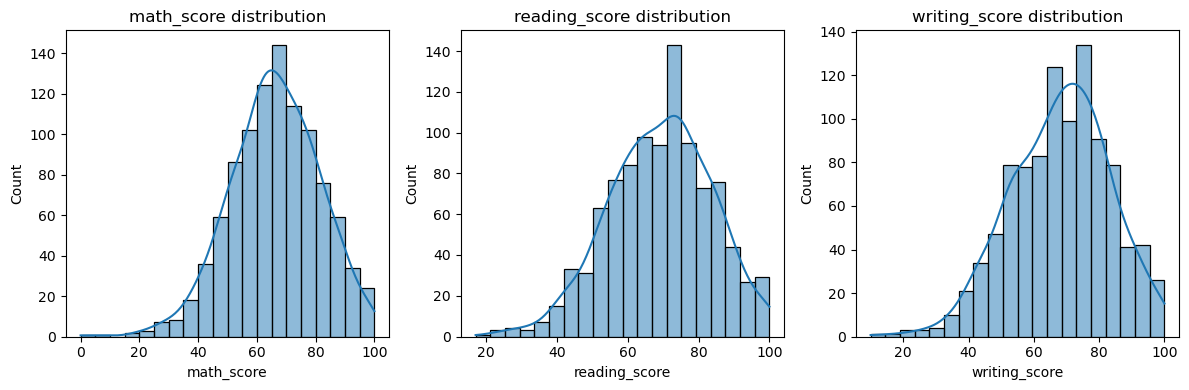

In [13]:
# Histograms for each score
score_cols = ['math_score', 'reading_score', 'writing_score']

plt.figure(figsize=(12, 4))
for i, col in enumerate(score_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} distribution')
plt.tight_layout()
plt.show()

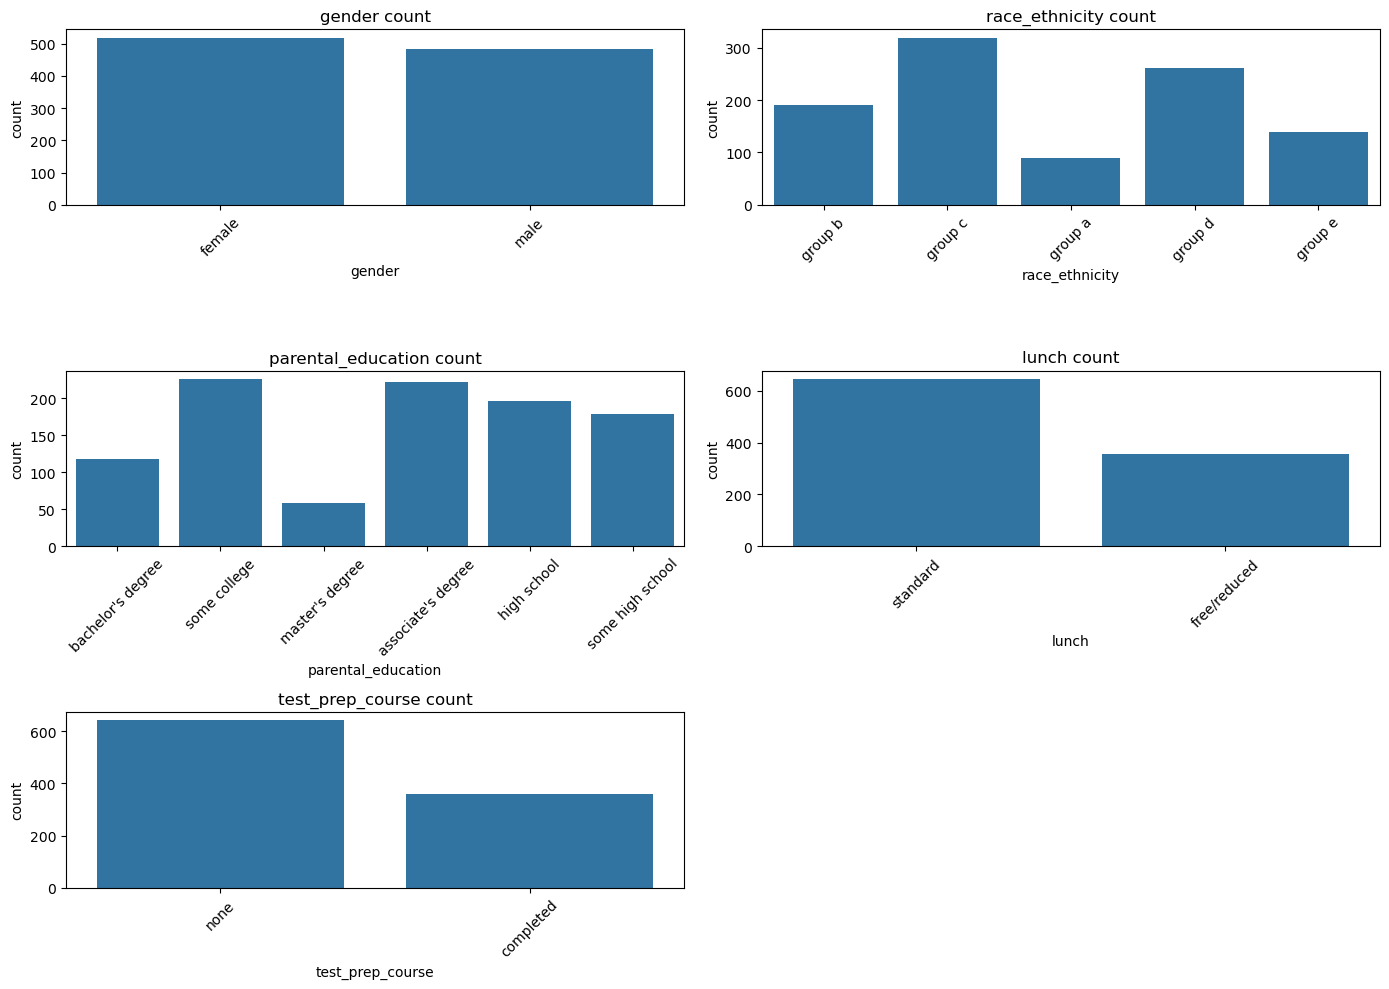

In [14]:
# Countplots for categorical variables
categorical_cols = ['gender', 'race_ethnicity', 'parental_education', 'lunch', 'test_prep_course']

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bivariate Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\2920850164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=subject, data=df, palette='pastel')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\2920850164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=subject, data=df, palette='pastel')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\2920850164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=subject, data=df, palette='pastel')


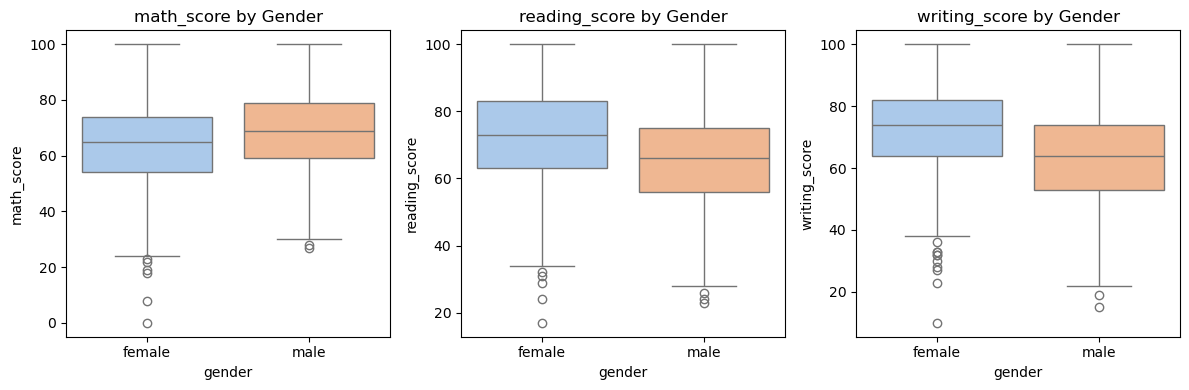

In [16]:
#Bivariate Analysis: Gender vs. Scores
plt.figure(figsize=(12, 4))
for i, subject in enumerate(['math_score', 'reading_score', 'writing_score'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='gender', y=subject, data=df, palette='pastel')
    plt.title(f'{subject} by Gender')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\2719257242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race_ethnicity', y=subject, data=df, palette='Set3')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\2719257242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race_ethnicity', y=subject, data=df, palette='Set3')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\2719257242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race_ethnicity', y=subject, data=df, palette='Set3')


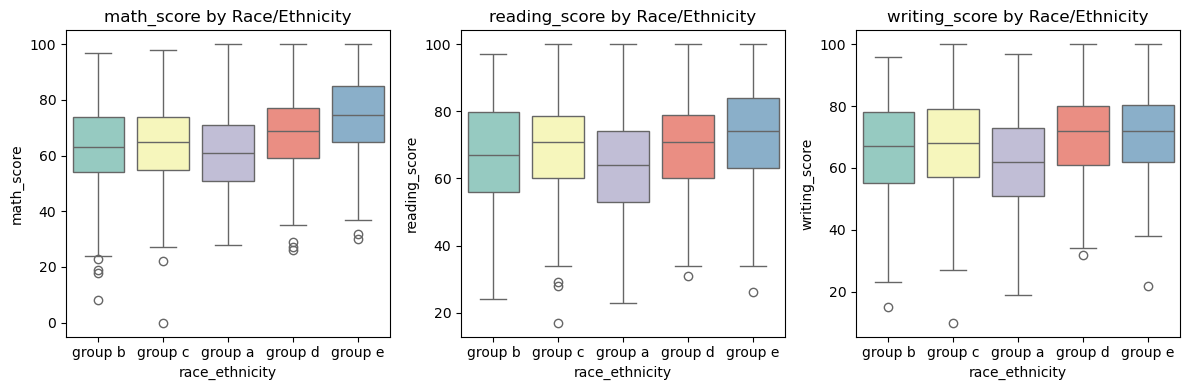

In [17]:
#Bivariate Analysis: Race/Ethnicity vs. Scores
plt.figure(figsize=(12, 4))
for i, subject in enumerate(['math_score', 'reading_score', 'writing_score'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='race_ethnicity', y=subject, data=df, palette='Set3')
    plt.title(f'{subject} by Race/Ethnicity')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\687456349.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='parental_education', y='average_score', data=df, palette='Blues_d', ci=None)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\687456349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental_education', y='average_score', data=df, palette='Blues_d', ci=None)


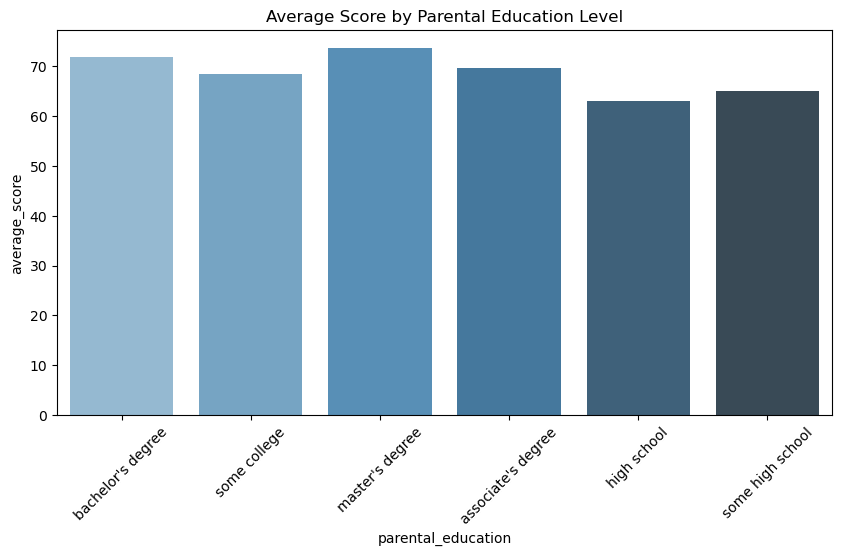

In [18]:
#Bivariate Analysis: Parental Education vs. Average Score
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

plt.figure(figsize=(10, 5))
sns.barplot(x='parental_education', y='average_score', data=df, palette='Blues_d', ci=None)
plt.title('Average Score by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\3394385268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lunch', y='average_score', data=df, palette='muted')


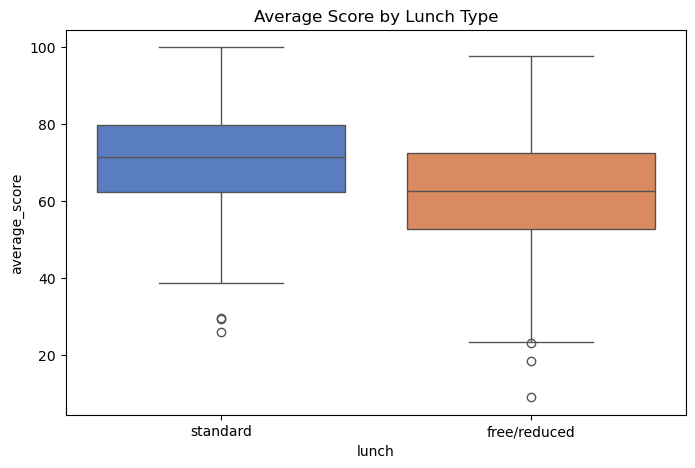

In [19]:
#Bivariate Analysis: Lunch Type vs. Scores
plt.figure(figsize=(8, 5))
sns.boxplot(x='lunch', y='average_score', data=df, palette='muted')
plt.title('Average Score by Lunch Type')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\3673987665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_prep_course', y='average_score', data=df, palette='Set2')


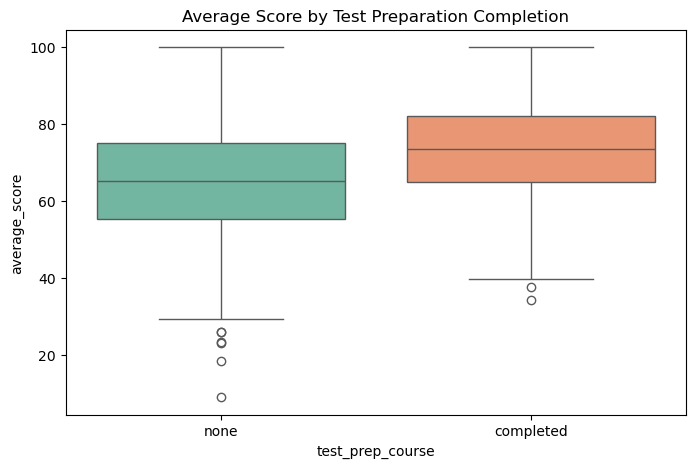

In [20]:
#Bivariate Analysis: Test Preparation Course vs. Scores
plt.figure(figsize=(8, 5))
sns.boxplot(x='test_prep_course', y='average_score', data=df, palette='Set2')
plt.title('Average Score by Test Preparation Completion')
plt.show()

## correlation matrix

In [21]:
# Compute correlation matrix for numeric columns
corr = df[['math_score', 'reading_score', 'writing_score', 'average_score']].corr()
print(corr)

               math_score  reading_score  writing_score  average_score
math_score       1.000000       0.817580       0.802642       0.918746
reading_score    0.817580       1.000000       0.954598       0.970331
writing_score    0.802642       0.954598       1.000000       0.965667
average_score    0.918746       0.970331       0.965667       1.000000


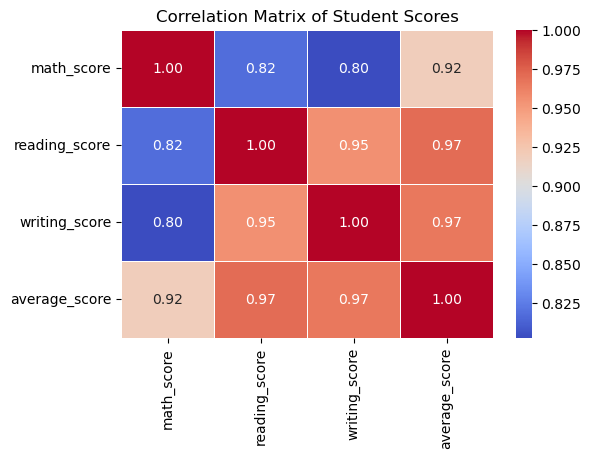

In [22]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Student Scores')
plt.show()

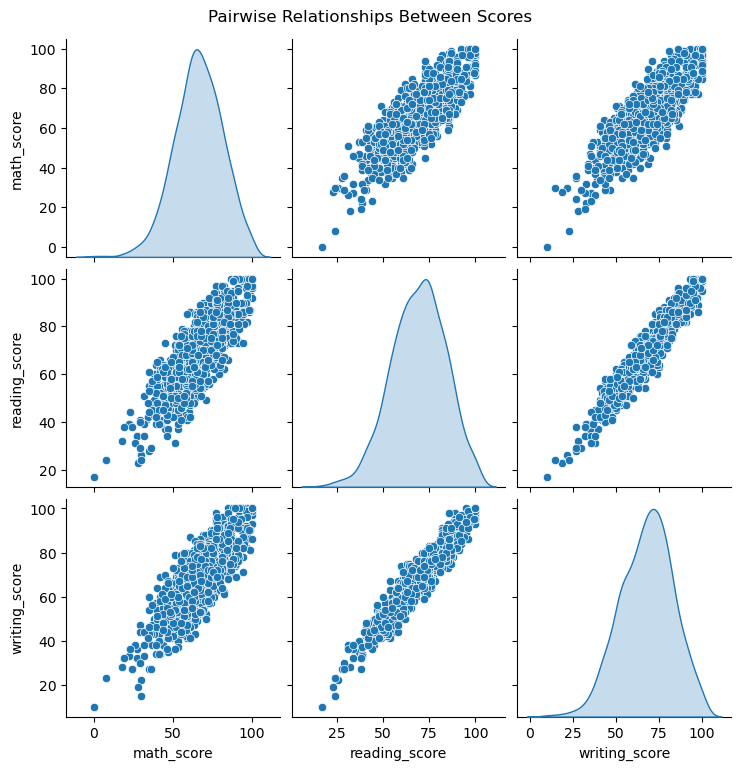

In [23]:
# Pairplot for numeric variables
sns.pairplot(df[['math_score', 'reading_score', 'writing_score']], diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Scores', y=1.02)
plt.show()

# Multivariate Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\2438672208.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


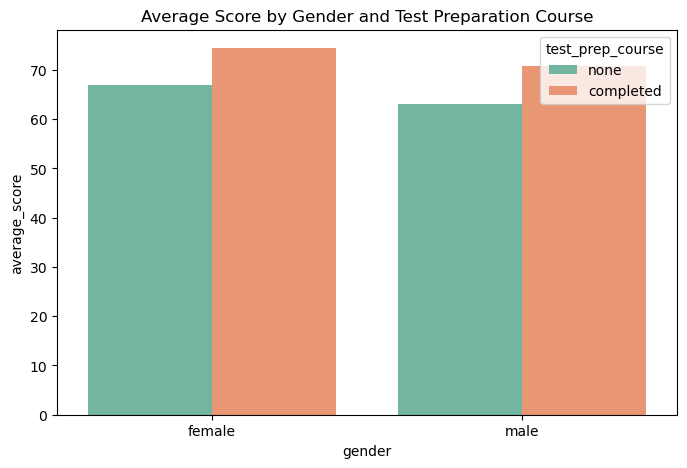

In [25]:
# Gender × Test Preparation Course
plt.figure(figsize=(8, 5))
sns.barplot(
    x='gender', 
    y='average_score', 
    hue='test_prep_course', 
    data=df, 
    ci=None, 
    palette='Set2'
)
plt.title('Average Score by Gender and Test Preparation Course')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\1406696688.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


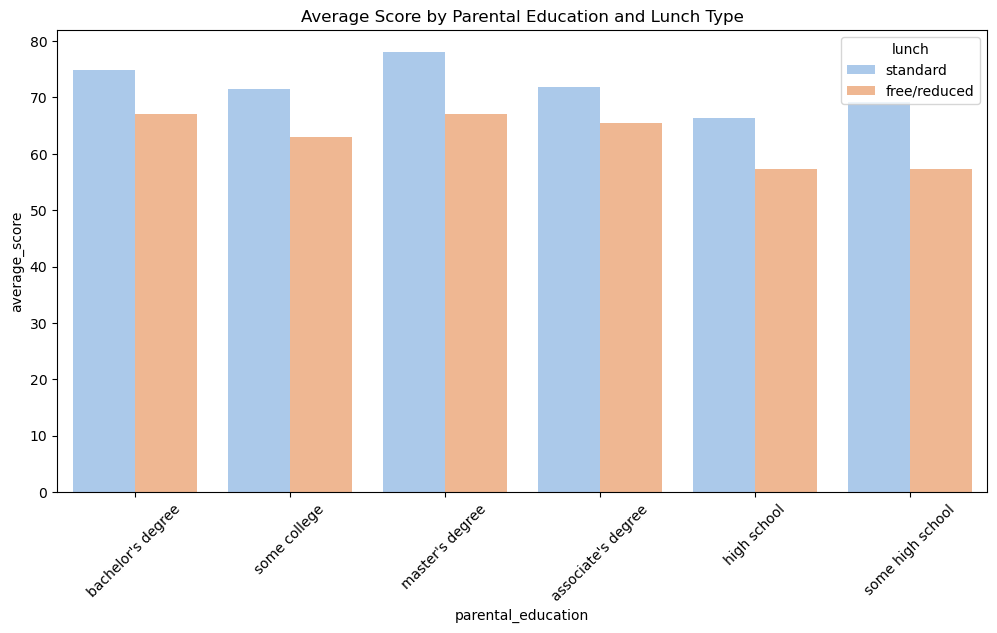

In [26]:
# Parental Education × Lunch Type
plt.figure(figsize=(12, 6))
sns.barplot(
    x='parental_education',
    y='average_score',
    hue='lunch',
    data=df,
    ci=None,
    palette='pastel'
)
plt.title('Average Score by Parental Education and Lunch Type')
plt.xticks(rotation=45)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\3368611669.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


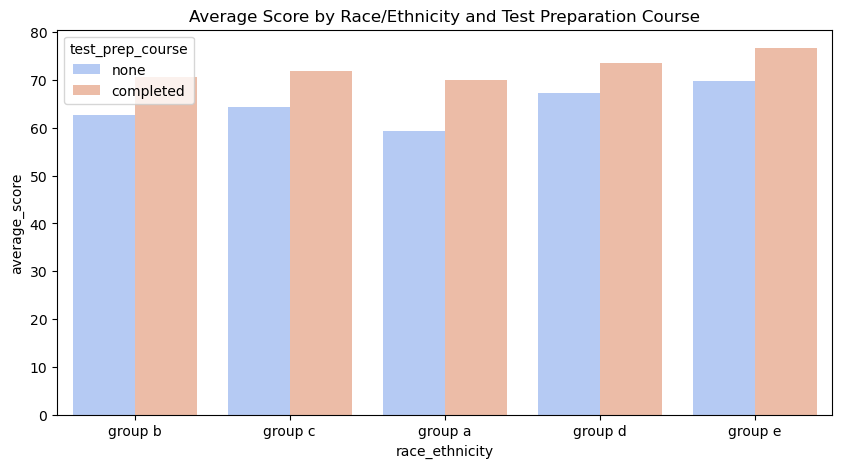

In [27]:
# Race/Ethnicity × Test Prep Course
plt.figure(figsize=(10, 5))
sns.barplot(
    x='race_ethnicity',
    y='average_score',
    hue='test_prep_course',
    data=df,
    ci=None,
    palette='coolwarm'
)
plt.title('Average Score by Race/Ethnicity and Test Preparation Course')
plt.show()